In [ ]:
#pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import Augmentor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataset/train.csv')
idx = len(df)
row = len(df)
row

32994

In [5]:
def get_labels(df):
    return df.iloc[:,2:].values


In [6]:
df #마지막이 32993

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32989,TRAIN_32989,./train/TRAIN_32989.jpg,1,0,0,0,1,0,1,1,1,1
32990,TRAIN_32990,./train/TRAIN_32990.jpg,1,0,0,0,0,1,1,1,1,1
32991,TRAIN_32991,./train/TRAIN_32991.jpg,1,0,0,0,0,1,1,1,1,1
32992,TRAIN_32992,./train/TRAIN_32992.jpg,1,0,0,0,0,1,1,1,1,1


In [7]:
name = df['id'].values
id = []
img_path = []
name

array(['TRAIN_00000', 'TRAIN_00001', 'TRAIN_00002', ..., 'TRAIN_32991',
       'TRAIN_32992', 'TRAIN_32993'], dtype=object)

In [8]:
def show_aug_image(image, generator, n_images=4):
	
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
	
    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    generator.fit(image_batch) 
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)

    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))
    global idx
    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        #print(aug_image.shape)
        id.append('TRAIN_' + str(idx))
        img_path.append('./train/TRAIN_' + str(idx) + '.jpg')
        cv2.imwrite('/content/drive/MyDrive/Colab_Notebooks/image/TRAIN_'+str(idx)+'.jpg', aug_image) ## 이미지저장 경로
        idx +=1
        #axs[i].imshow(aug_image)

32995
32996
32997
32998
32999
33000
33001
33002
33003
33004
33005
33006
33007
33008
33009
33010
33011
33012
33013
33014
33015


<ipython-input-8-662d87fee7d6>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))


33016
33017
33018
33019
33020
33021
33022
33023
33024
33025
33026
33027
33028
33029
33030
33031
33032
33033
33034
33035
33036
33037
33038
33039
33040
33041
33042
33043
33044


KeyboardInterrupt: ignored

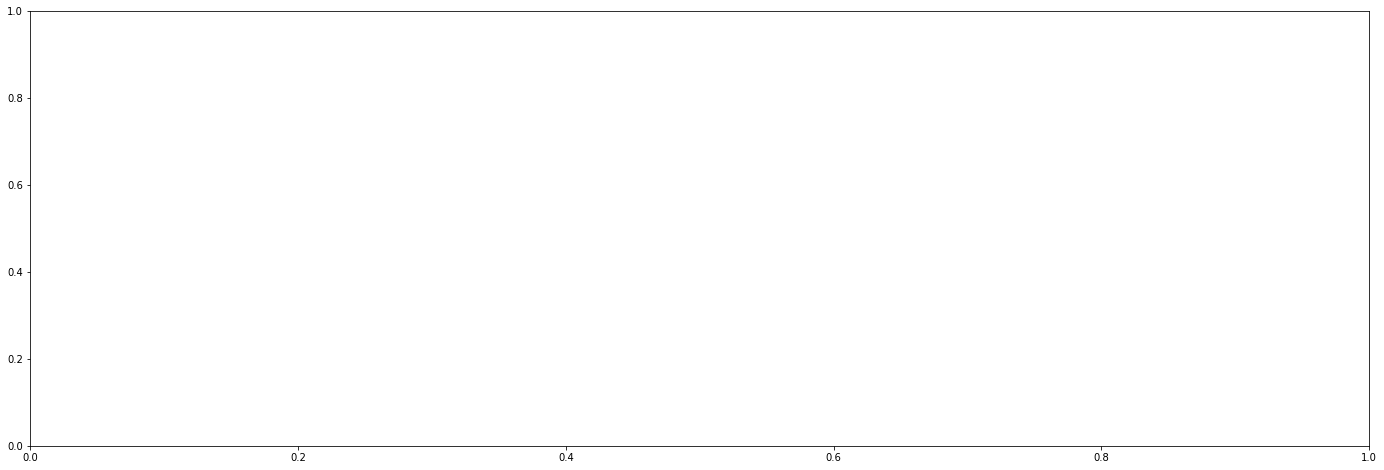

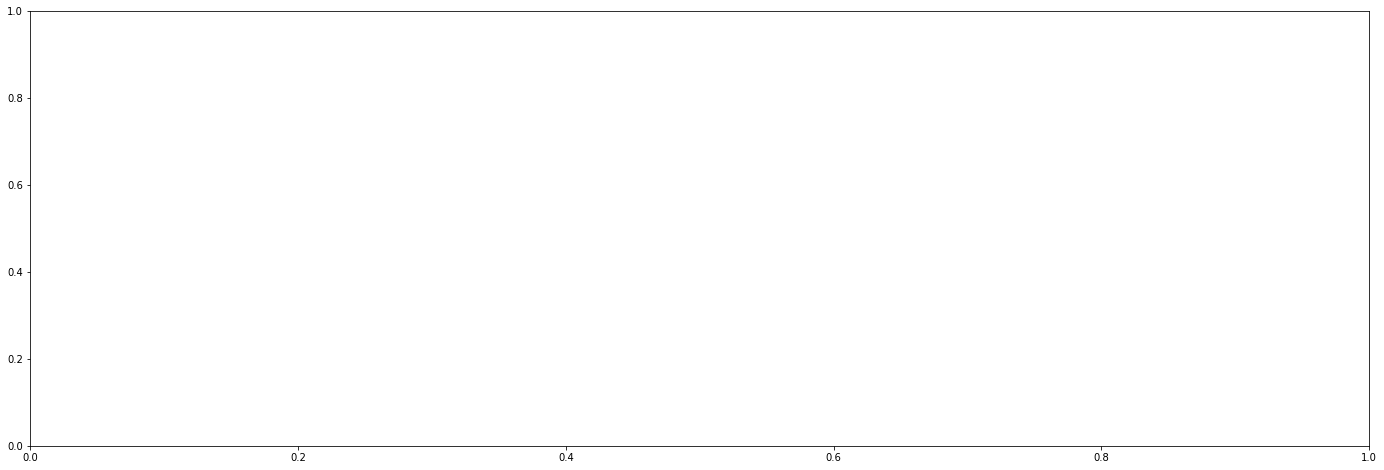

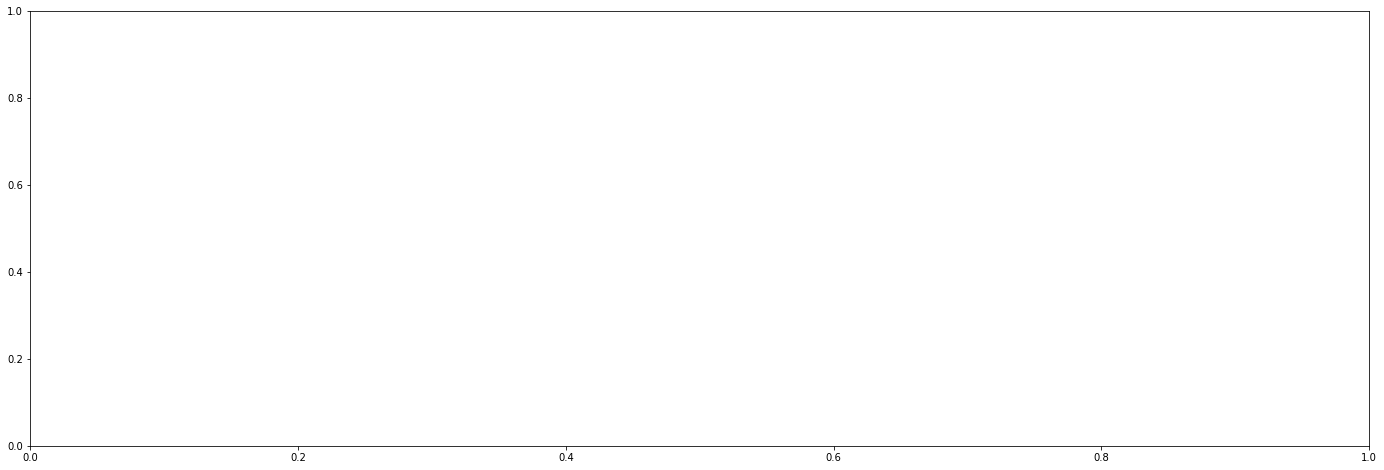

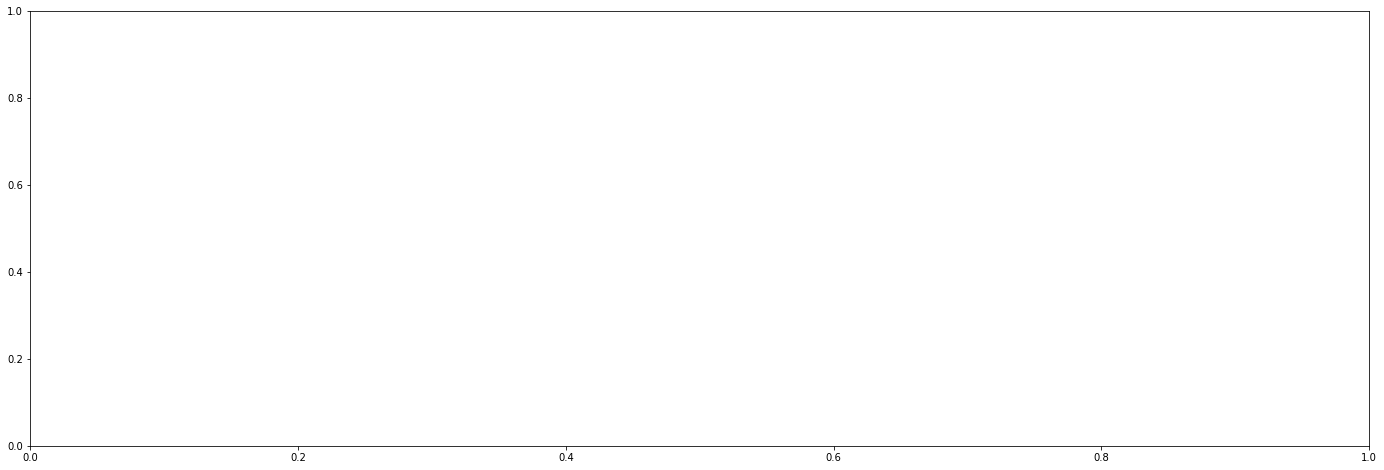

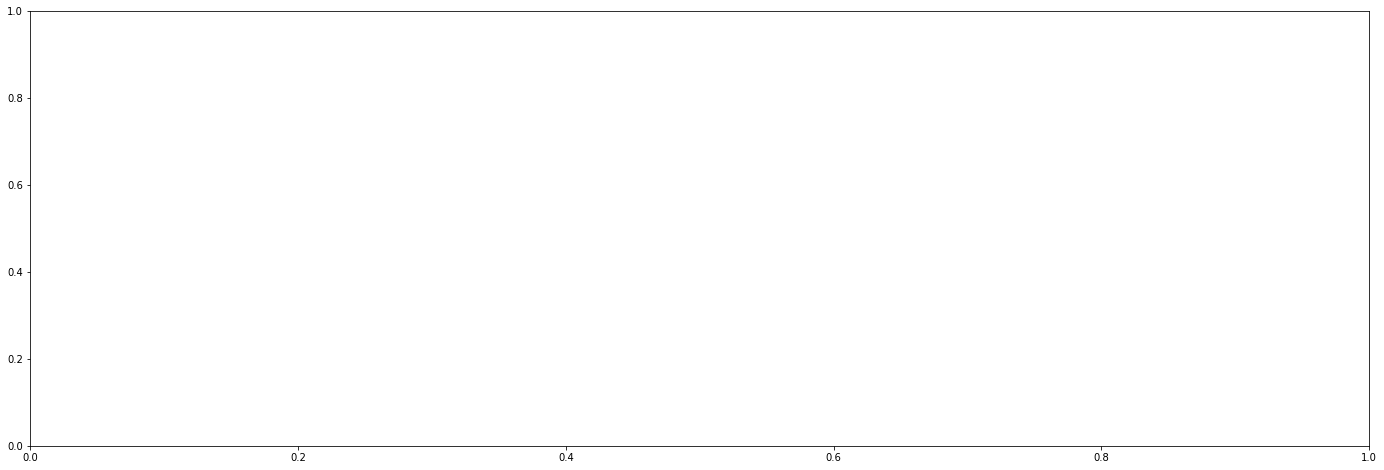

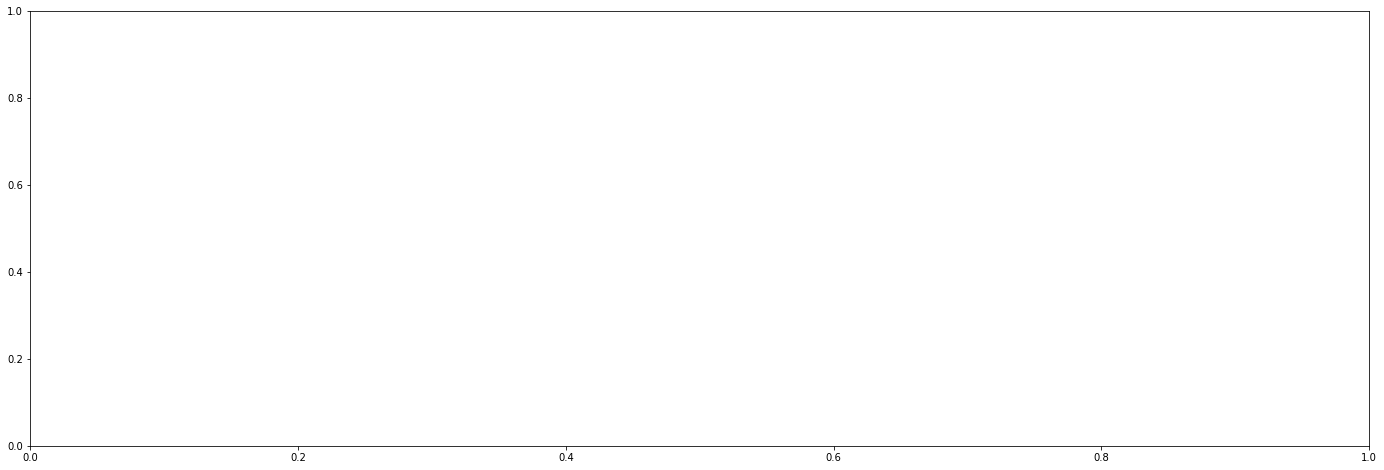

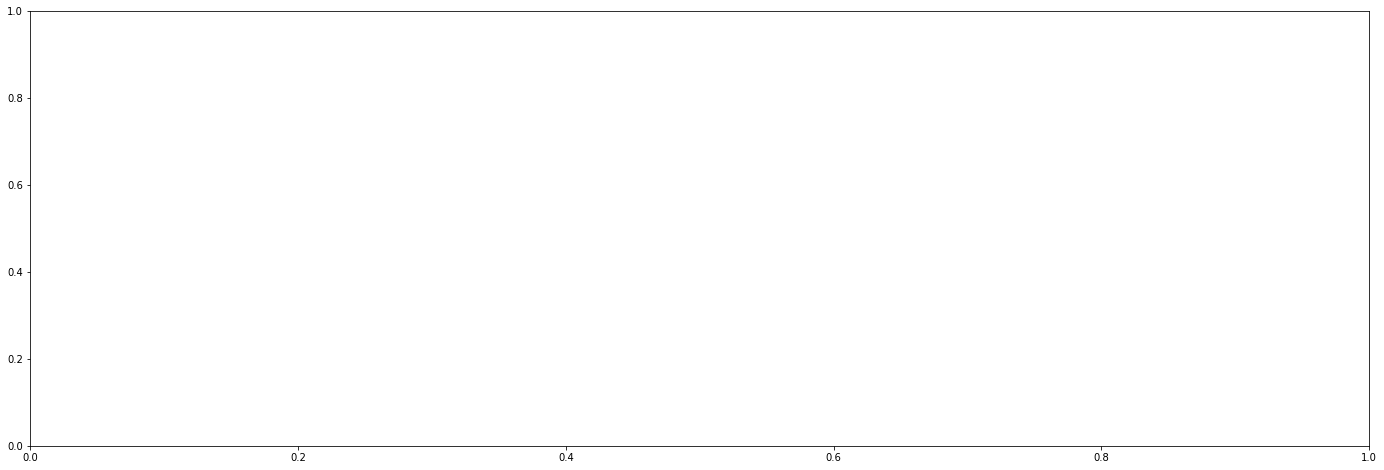

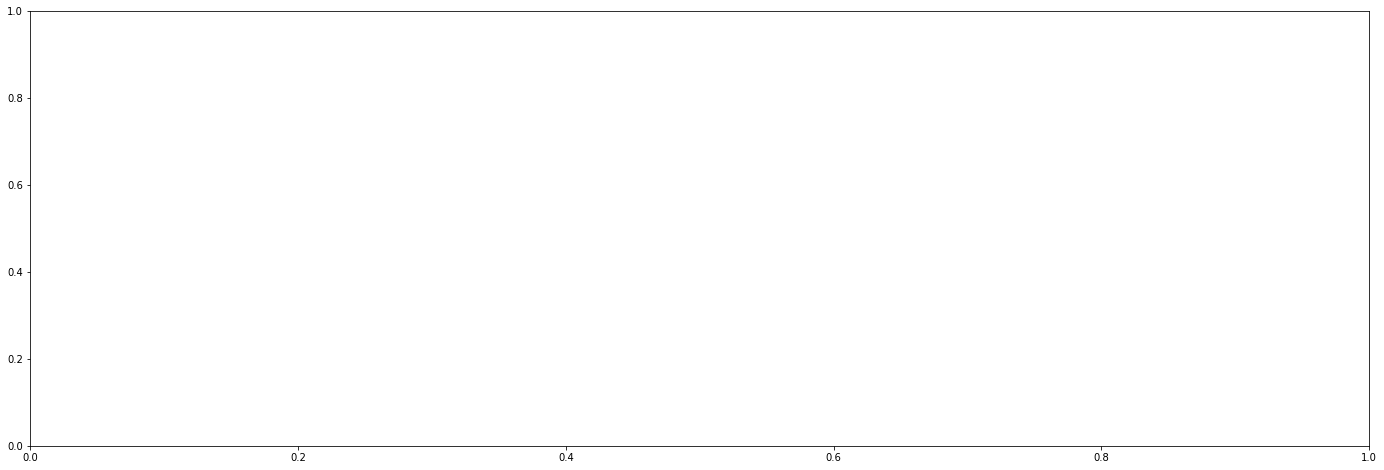

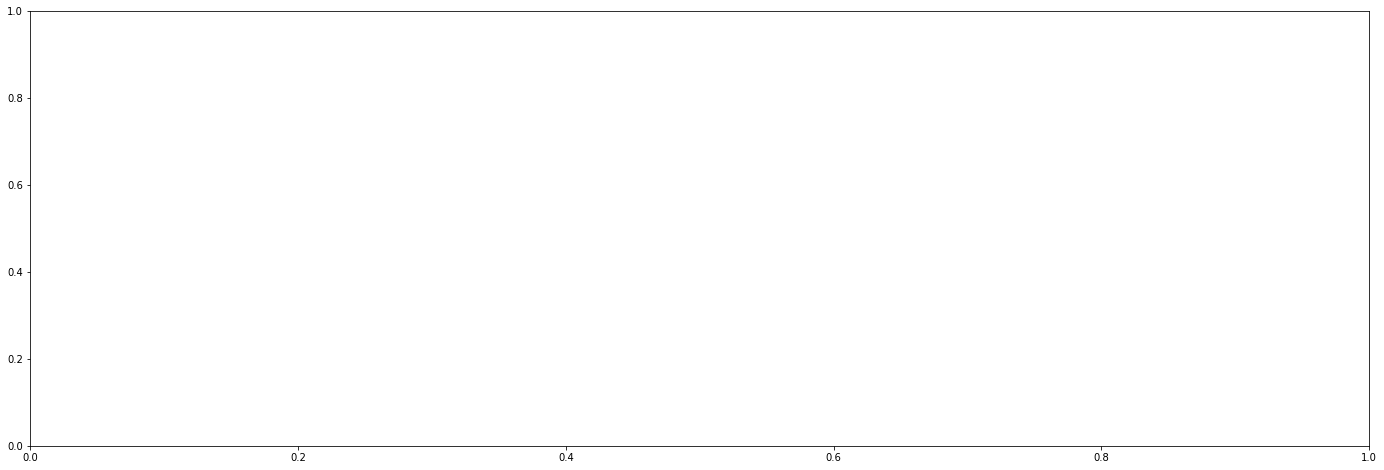

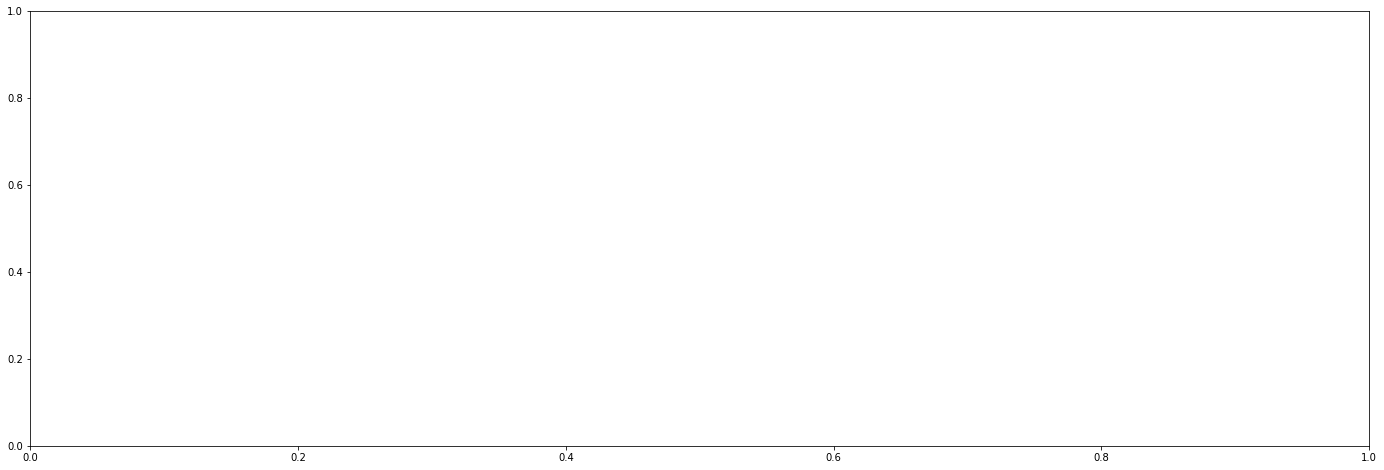

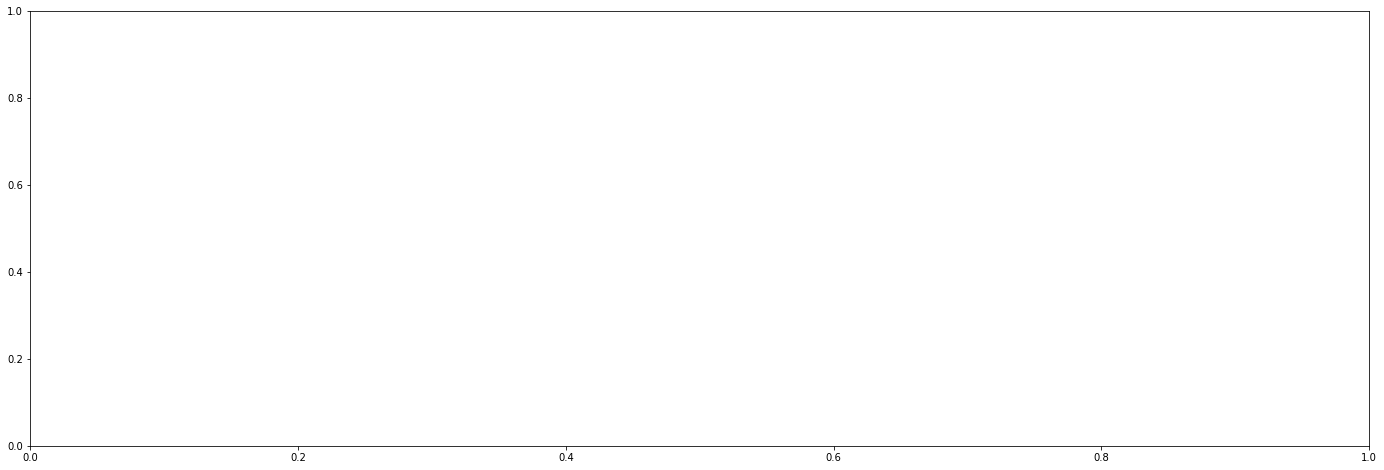

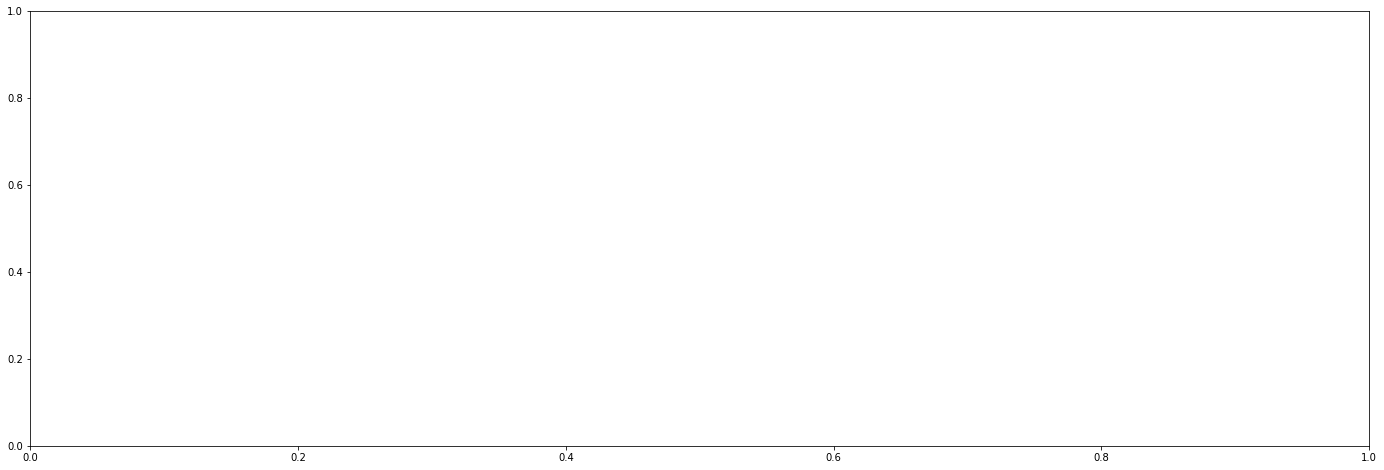

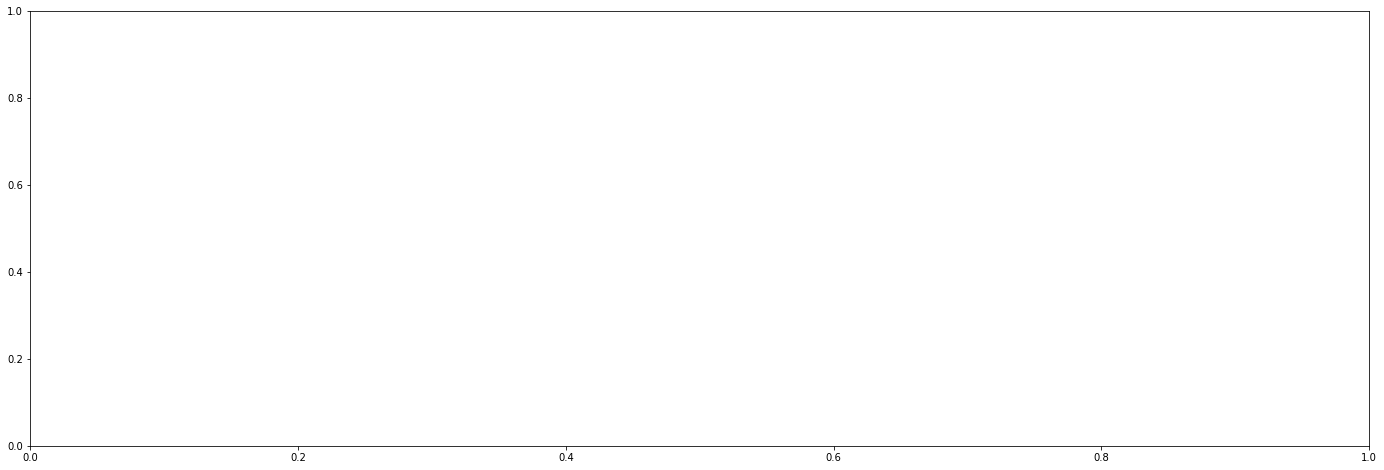

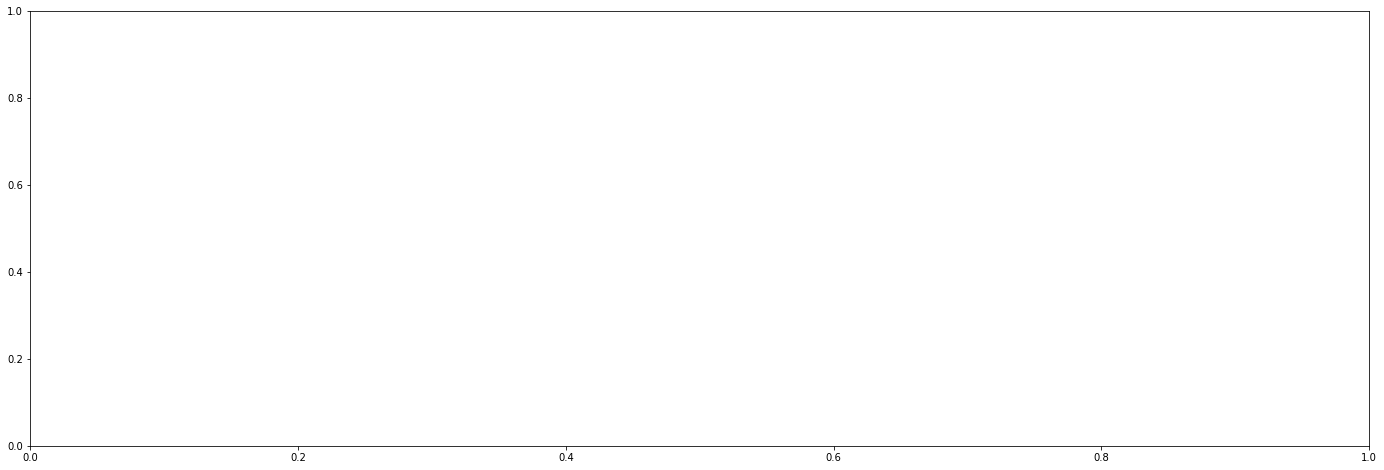

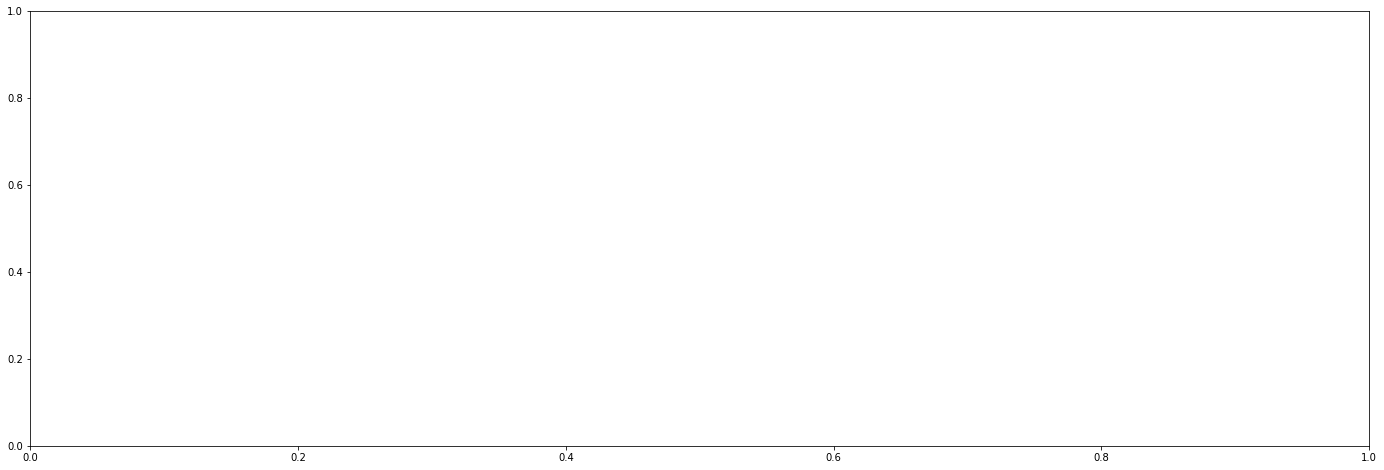

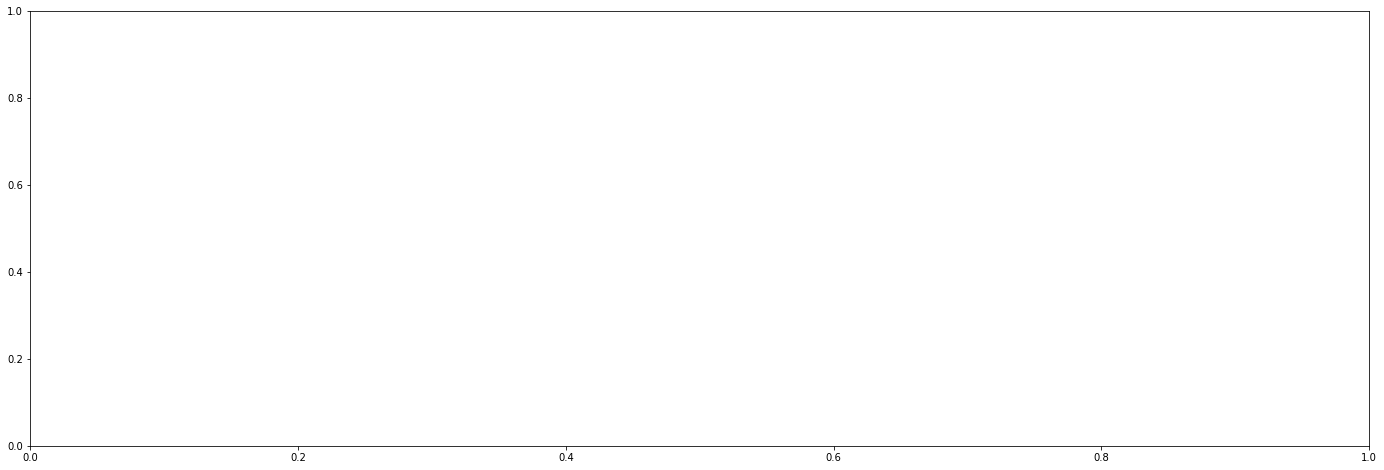

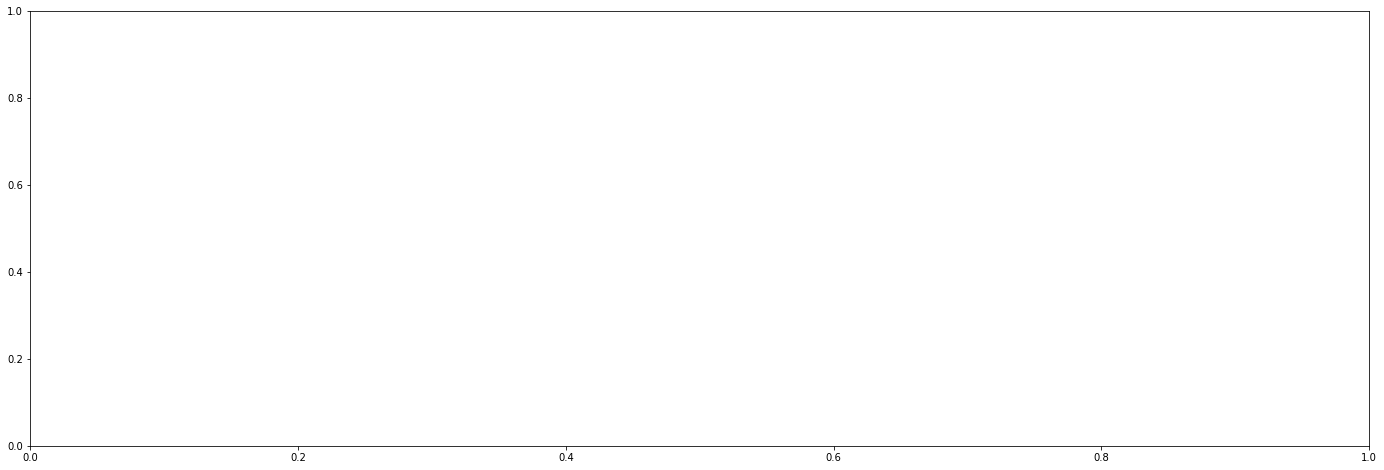

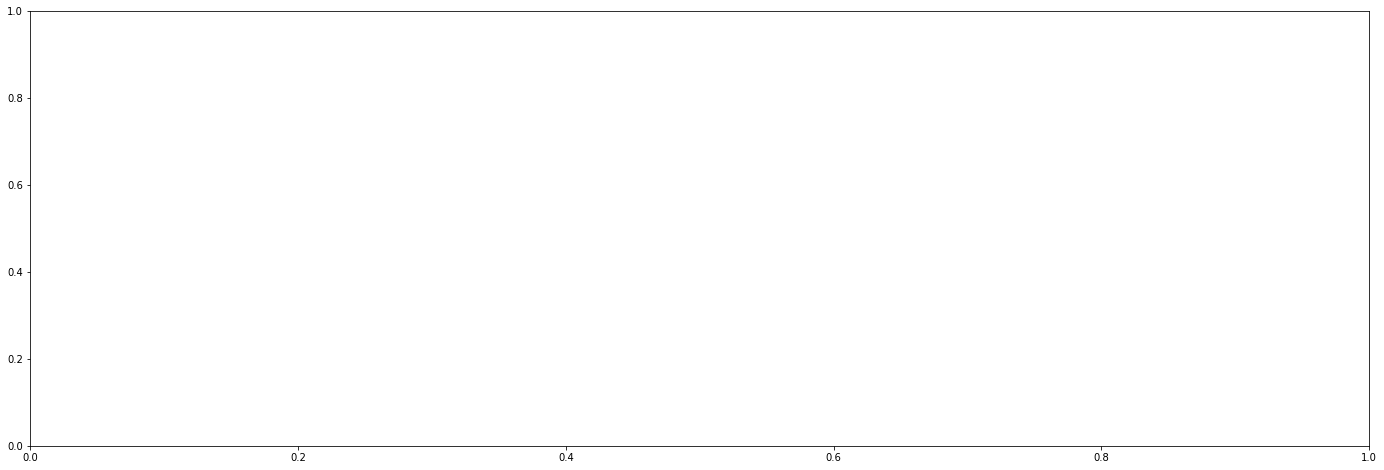

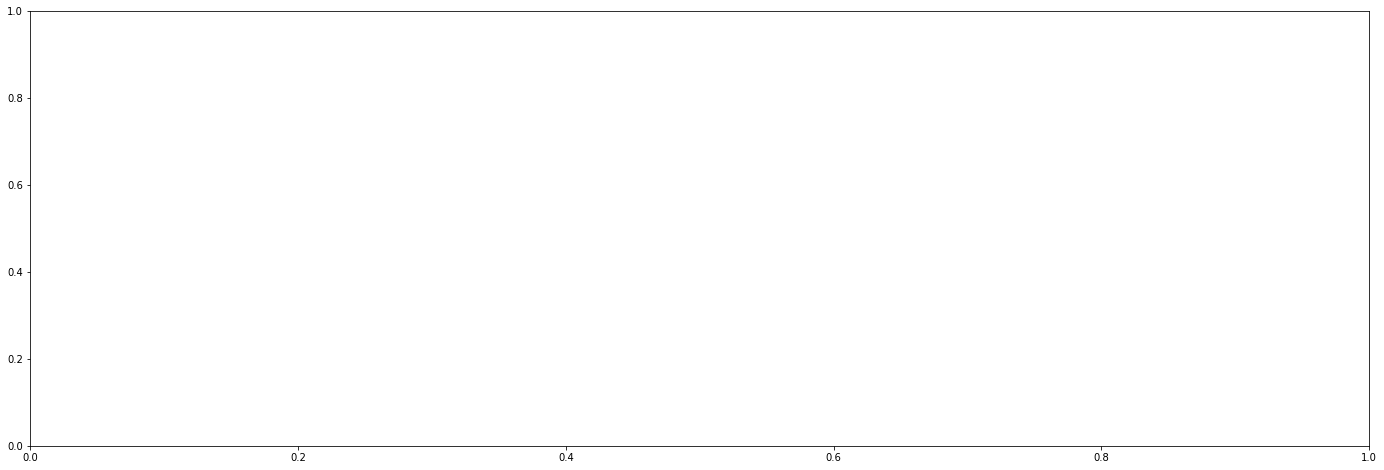

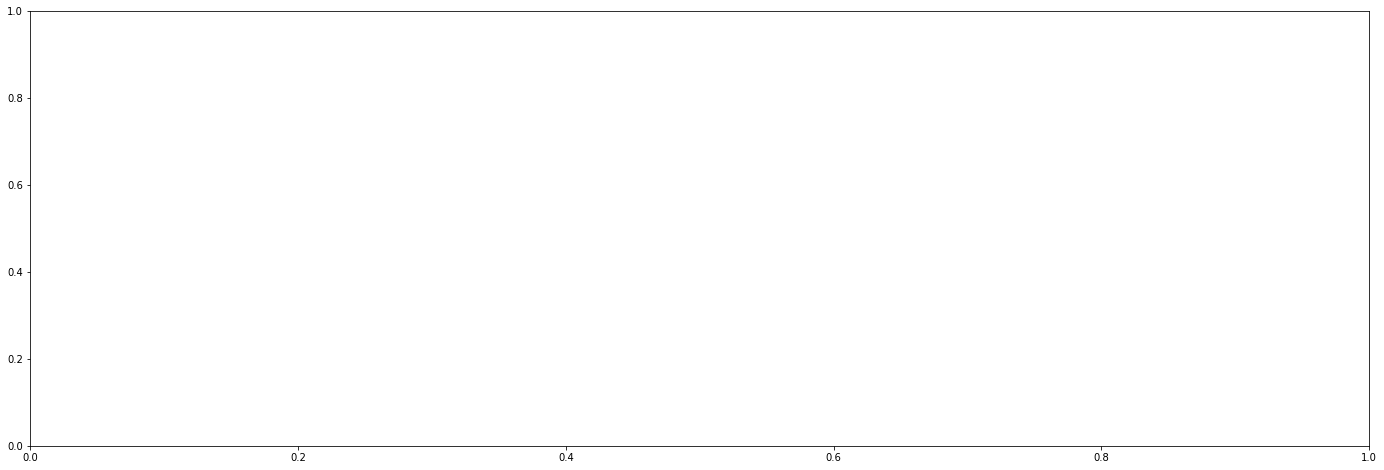

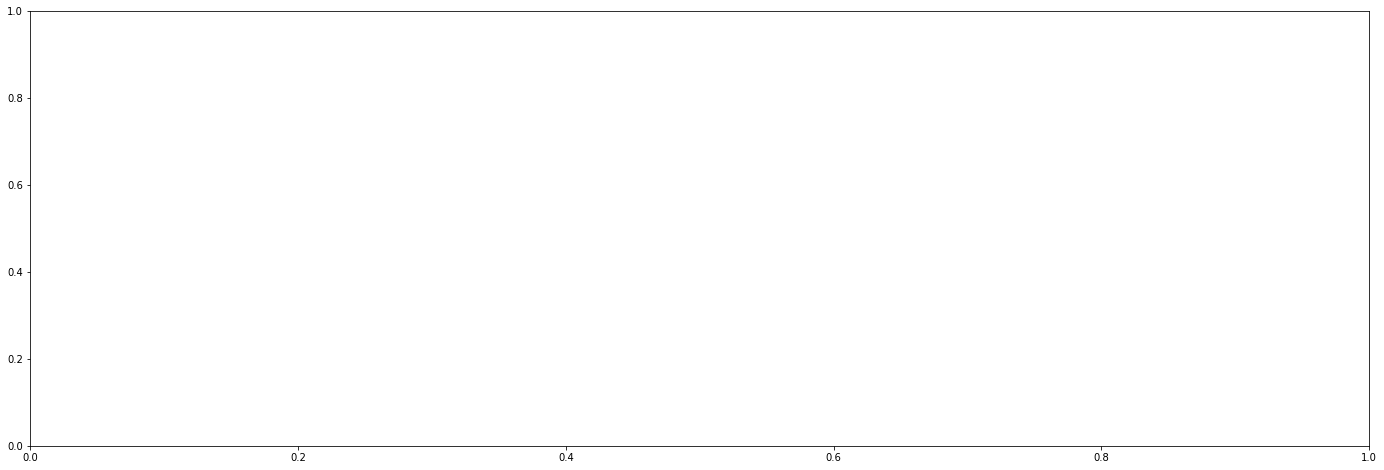

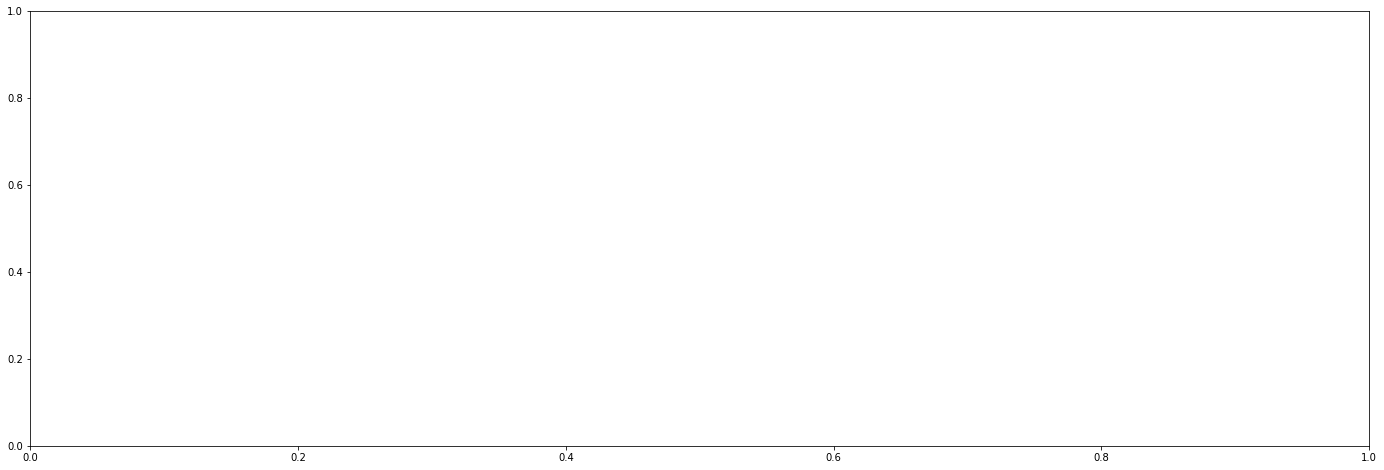

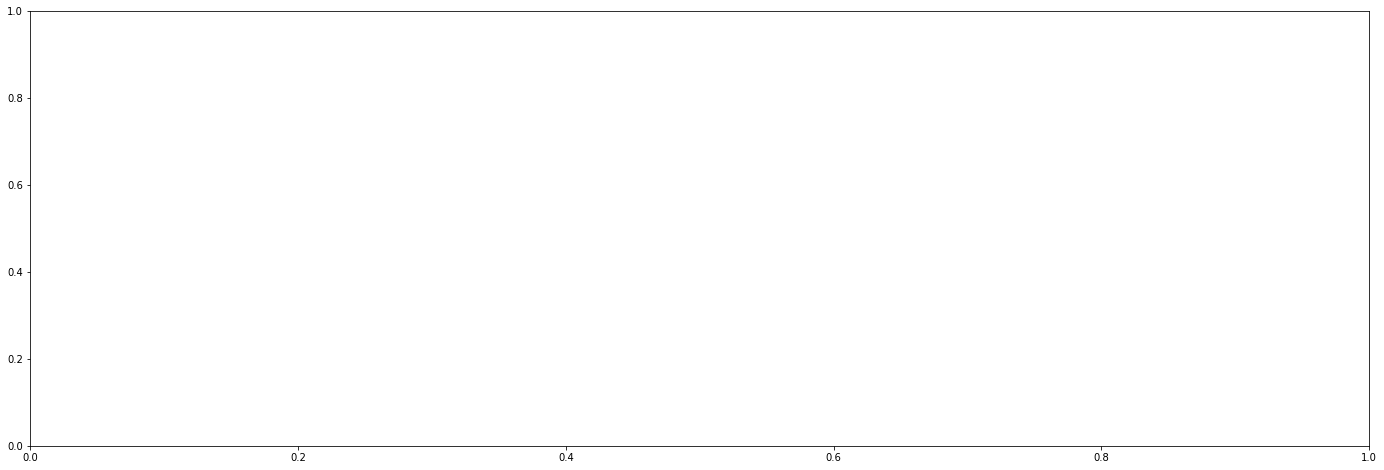

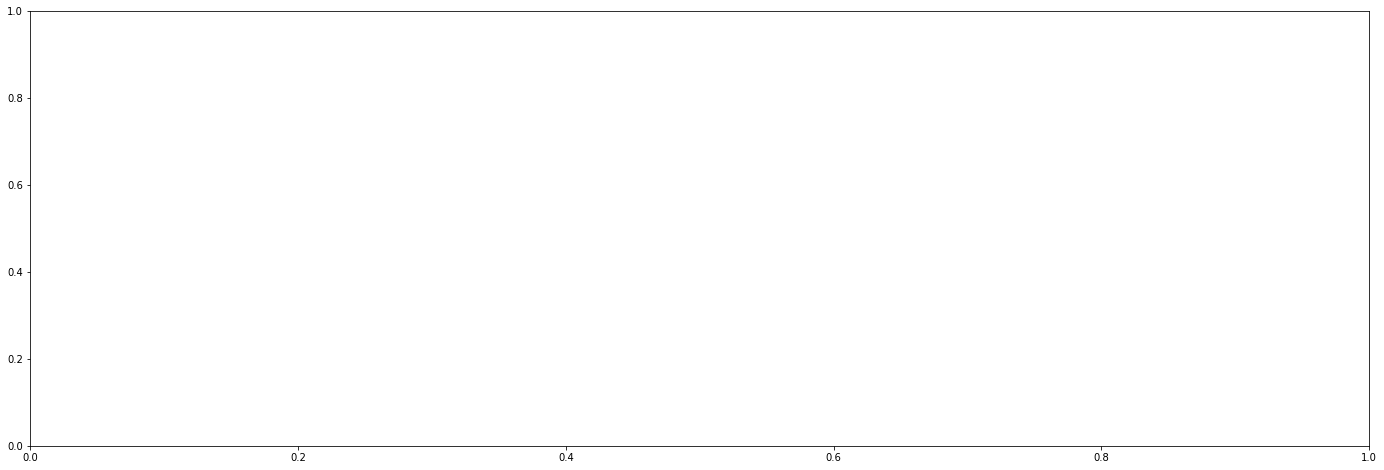

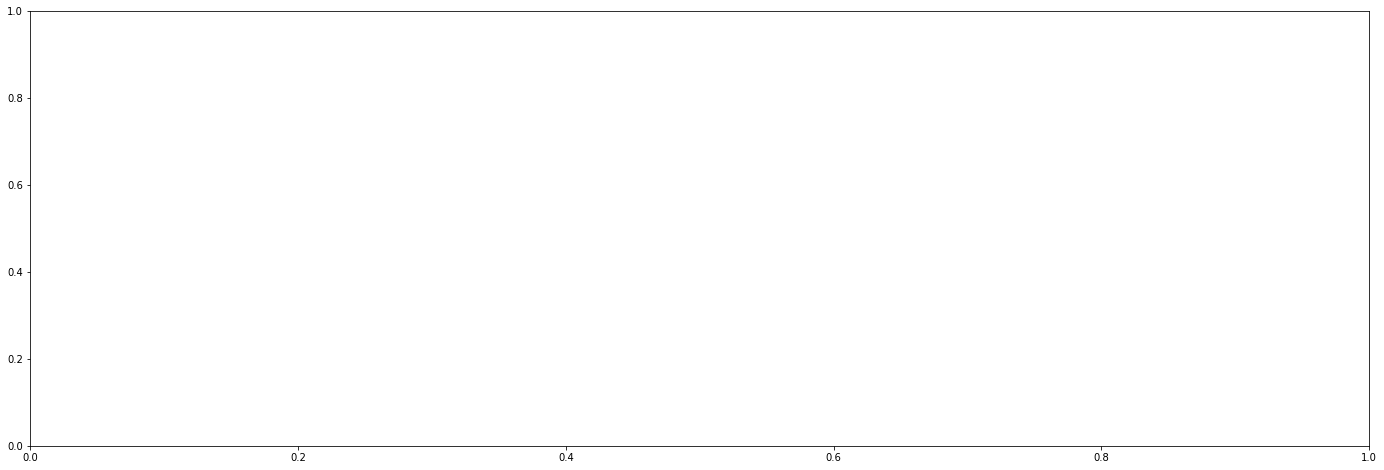

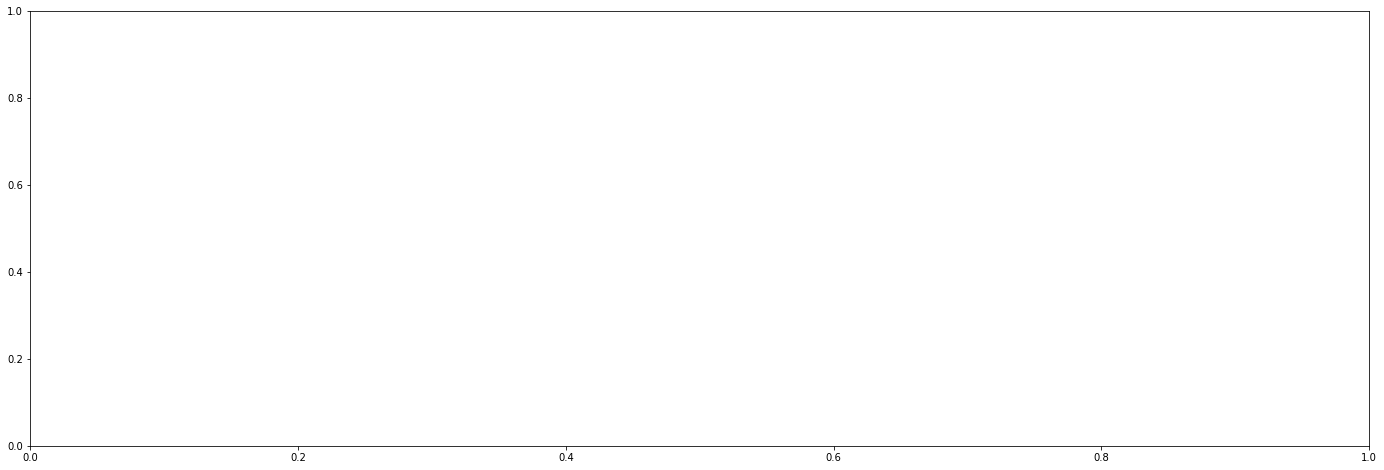

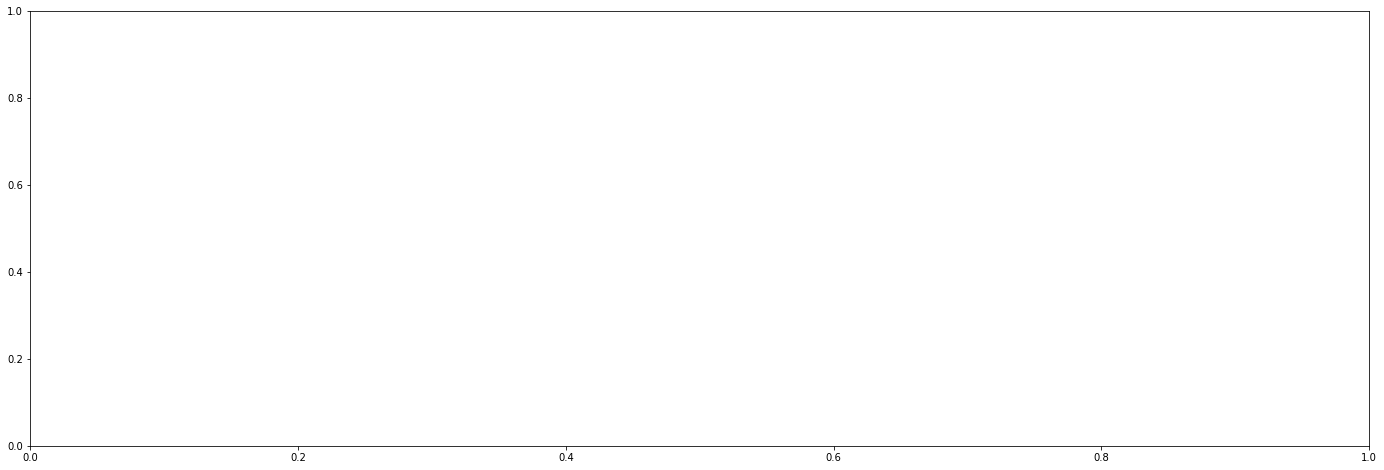

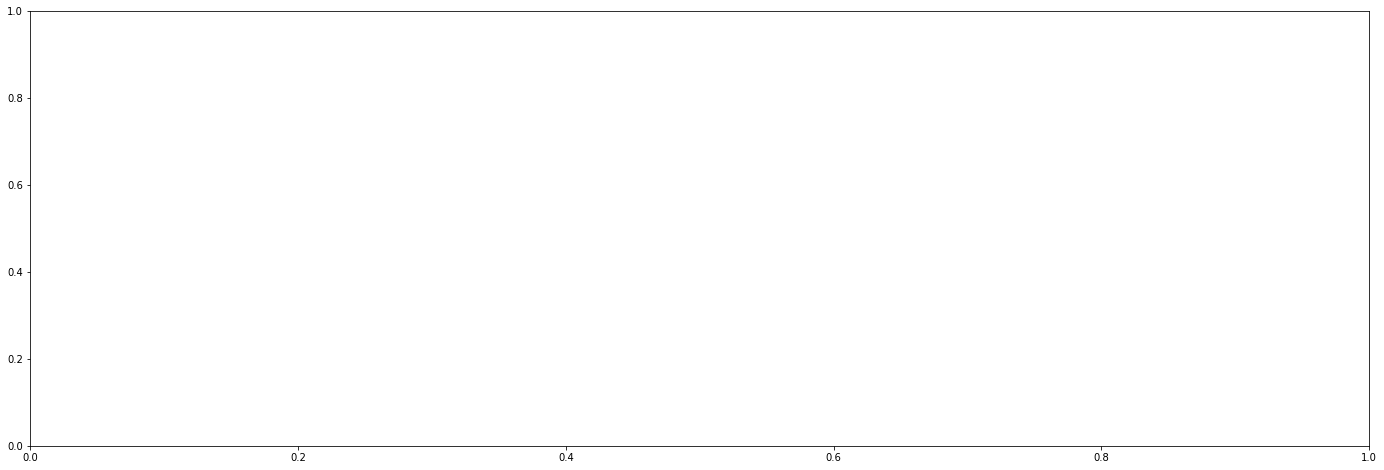

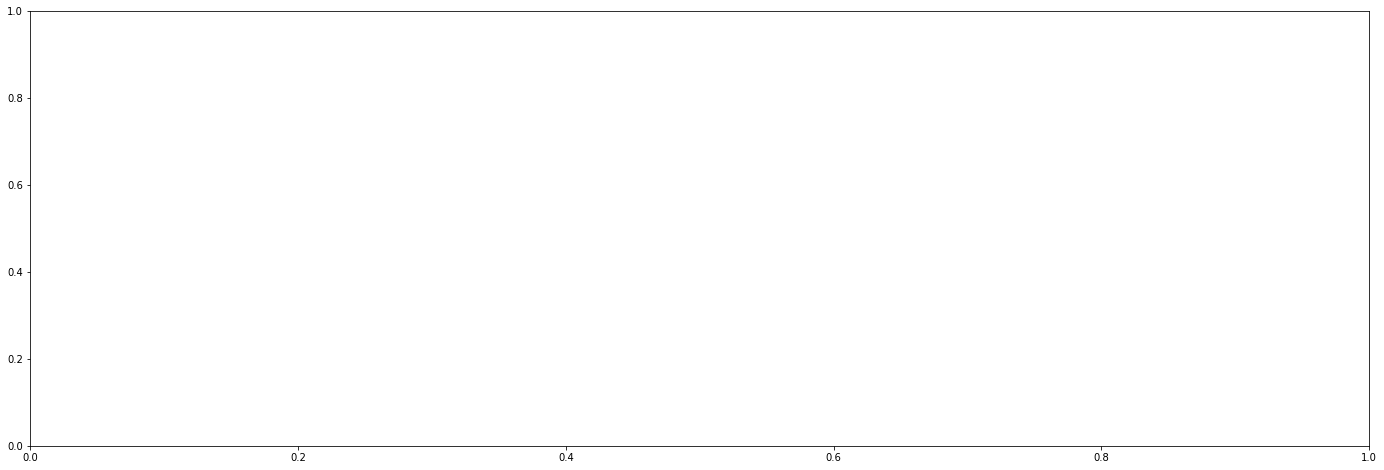

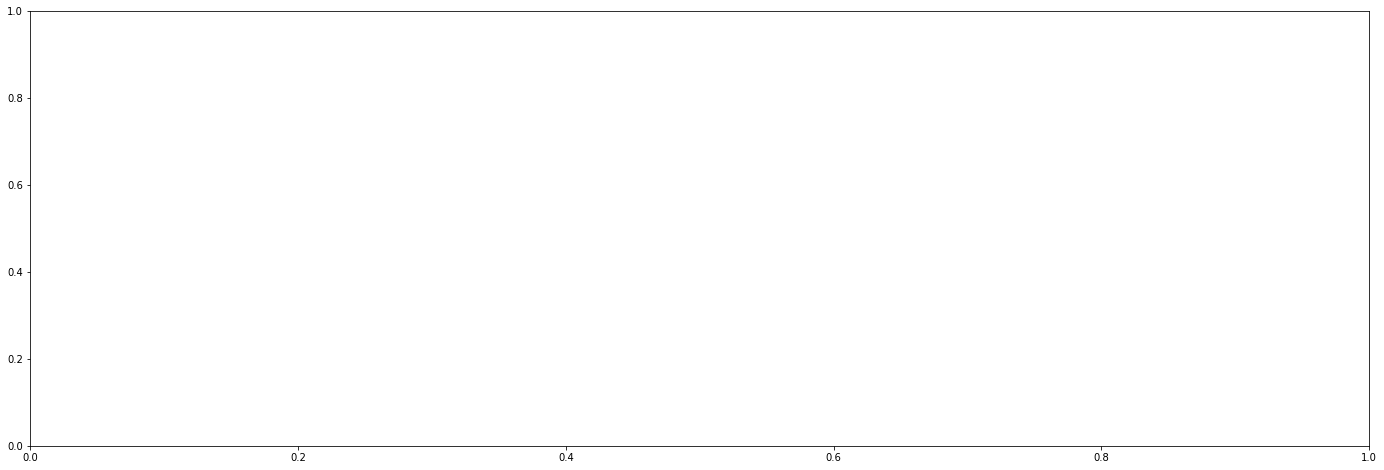

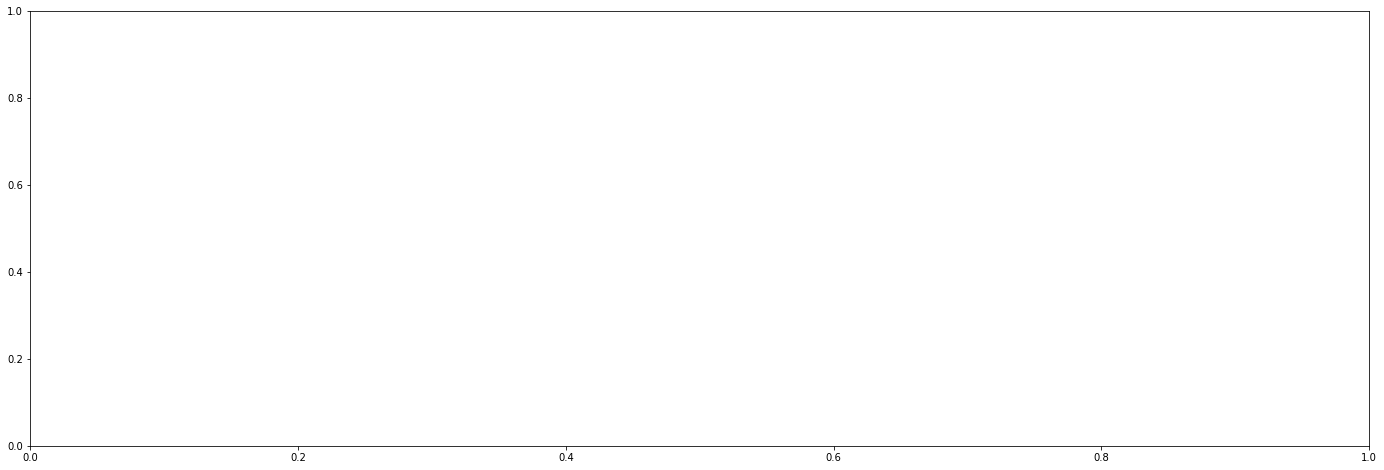

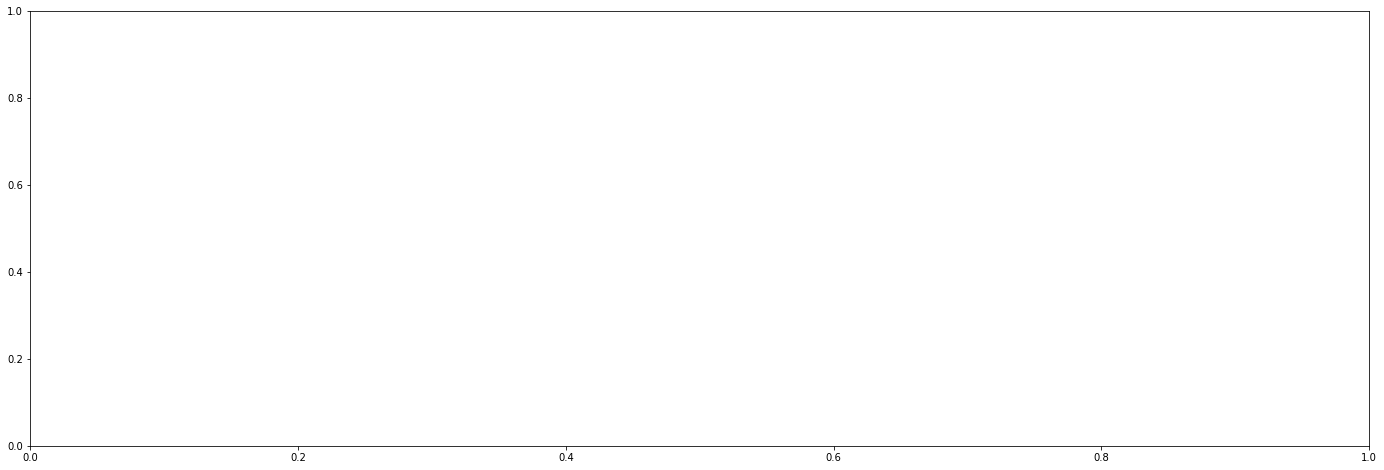

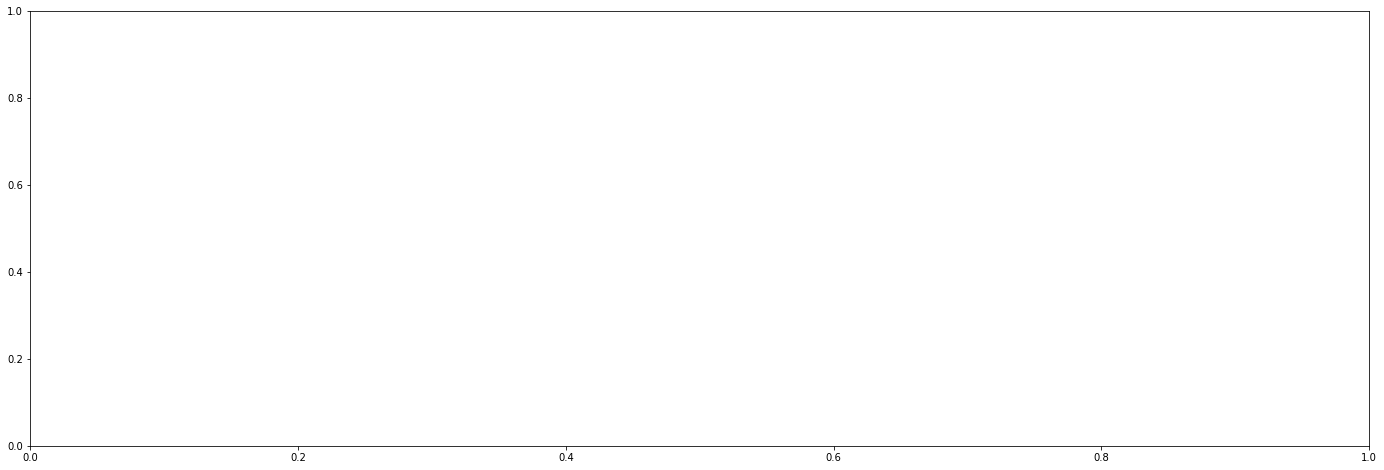

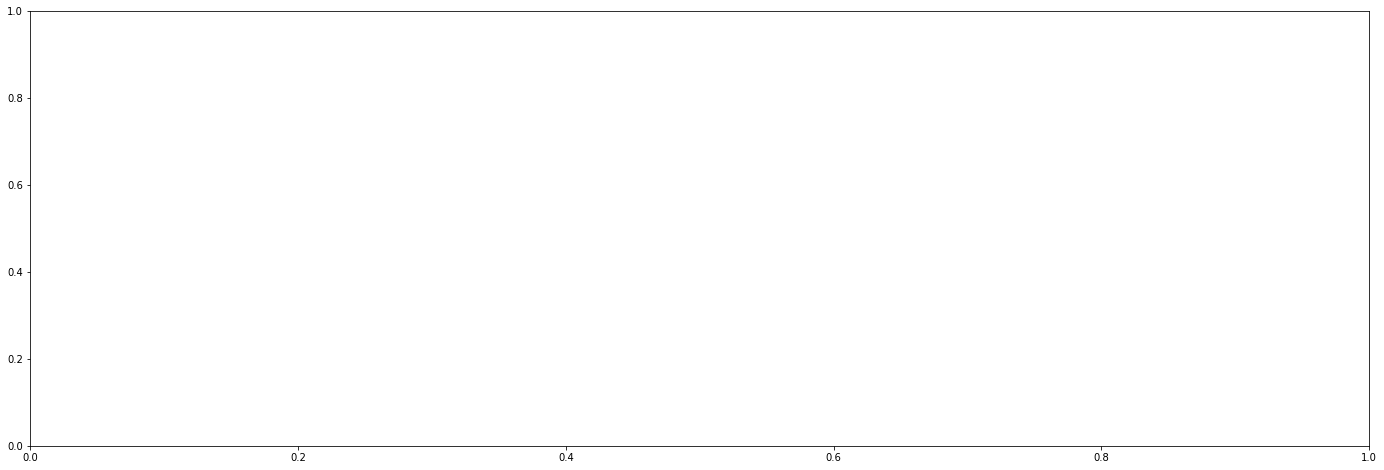

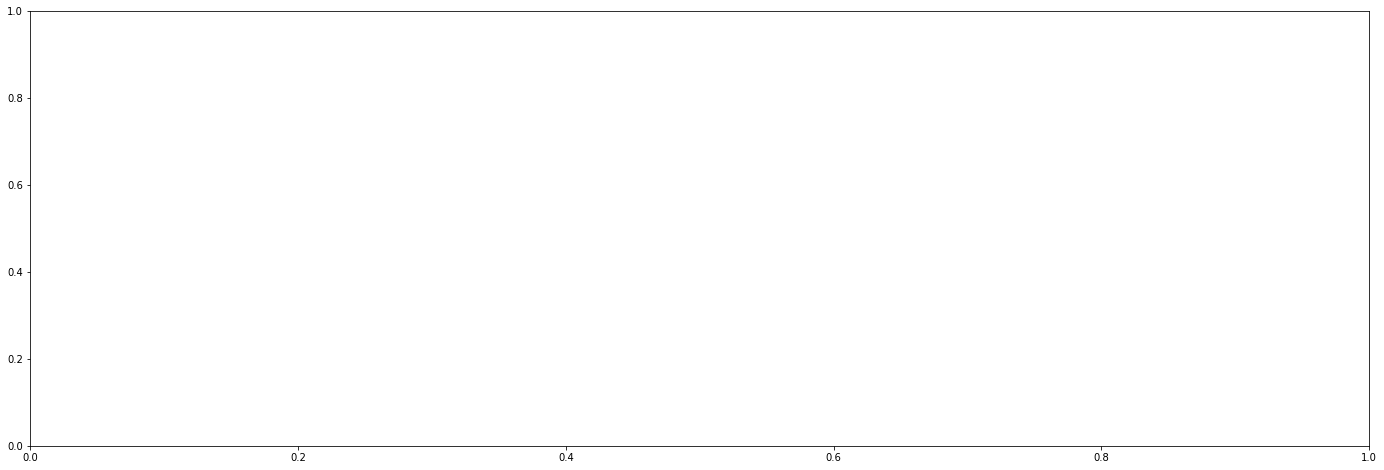

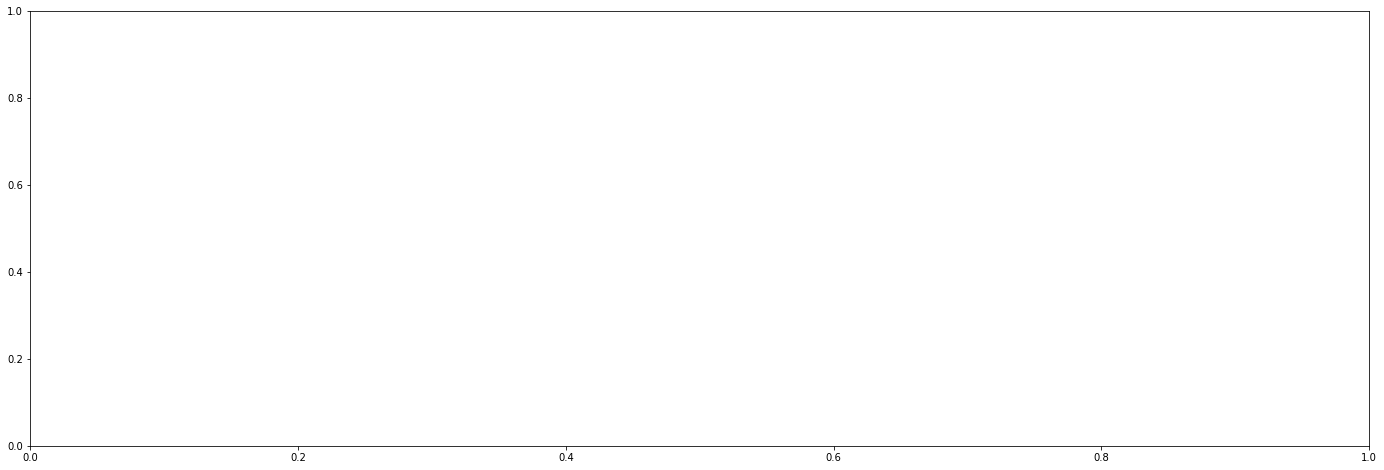

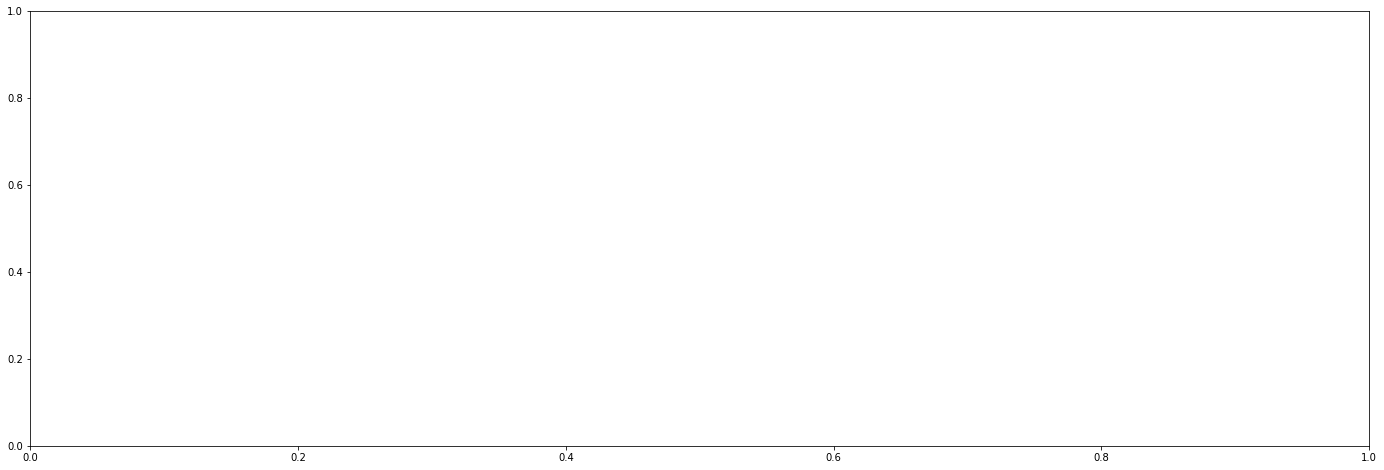

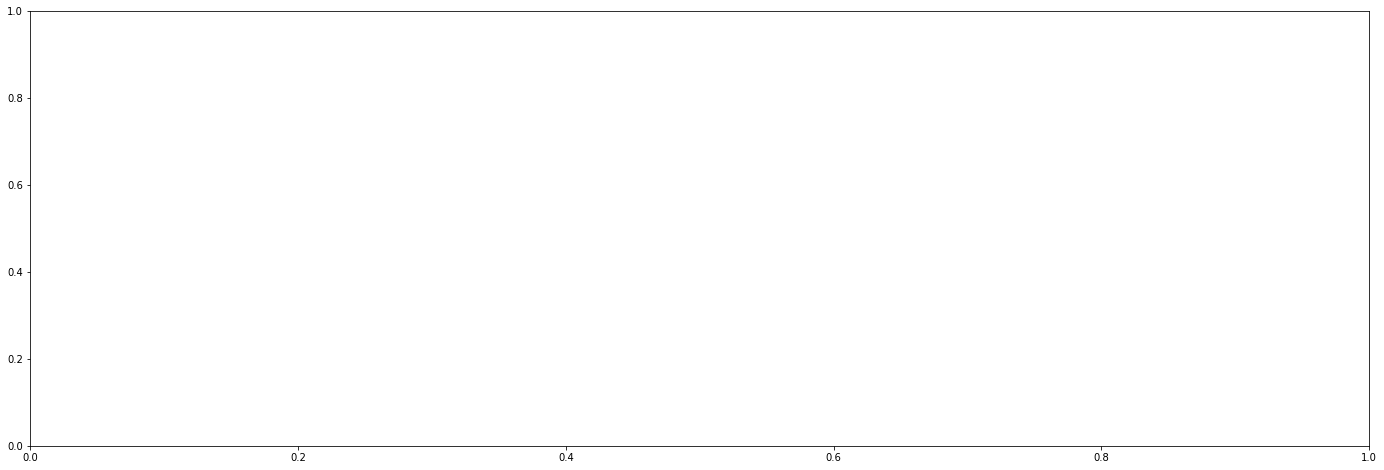

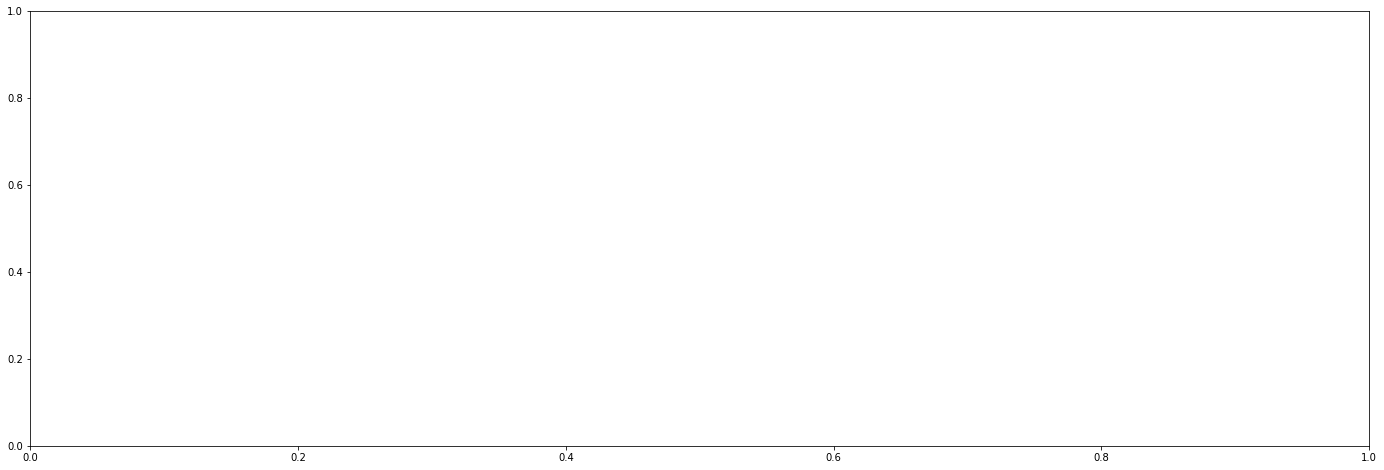

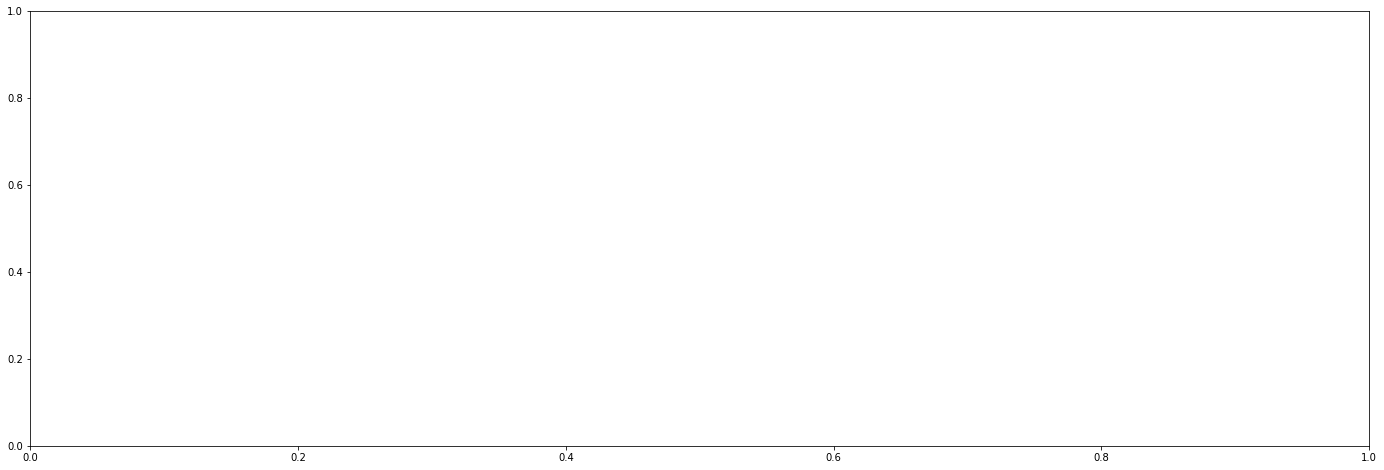

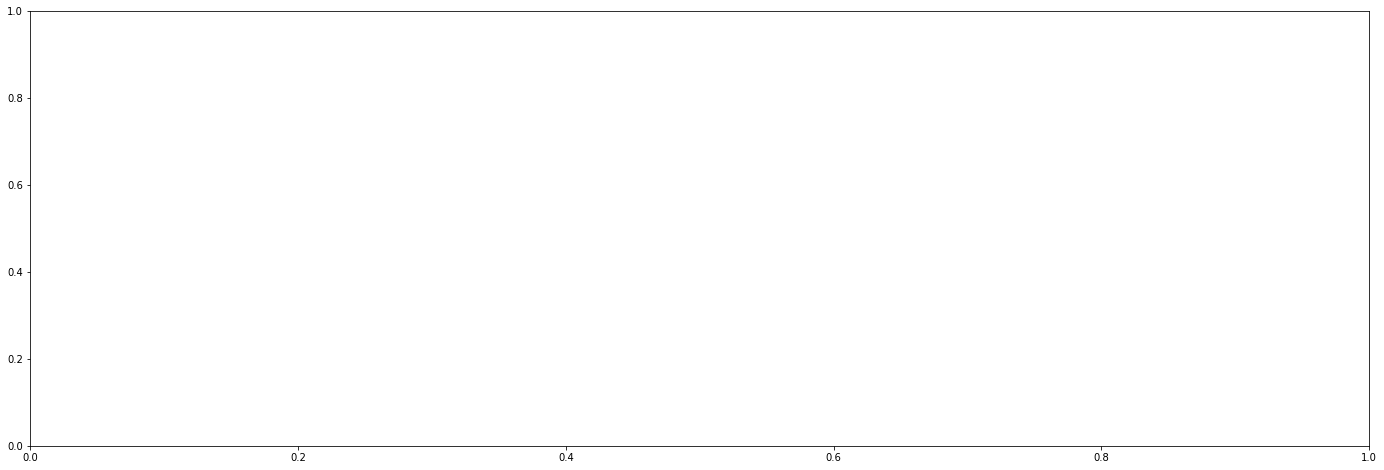

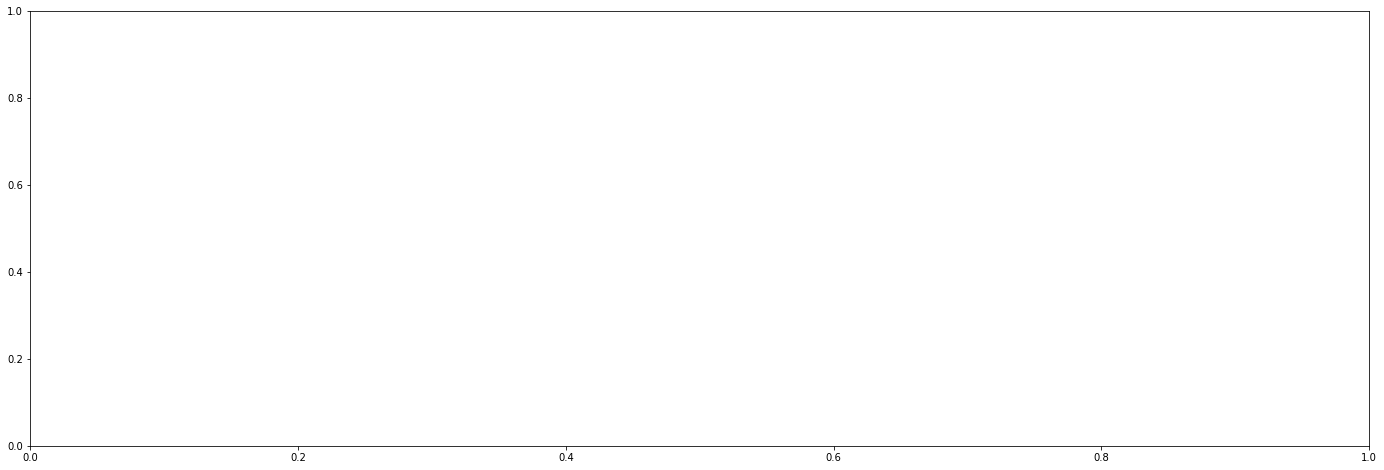

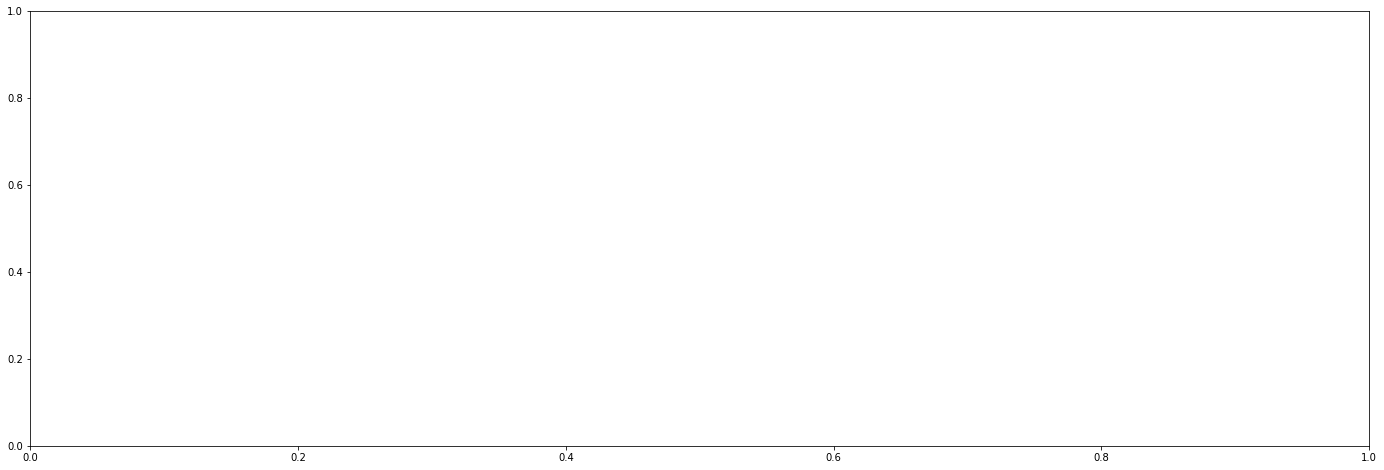

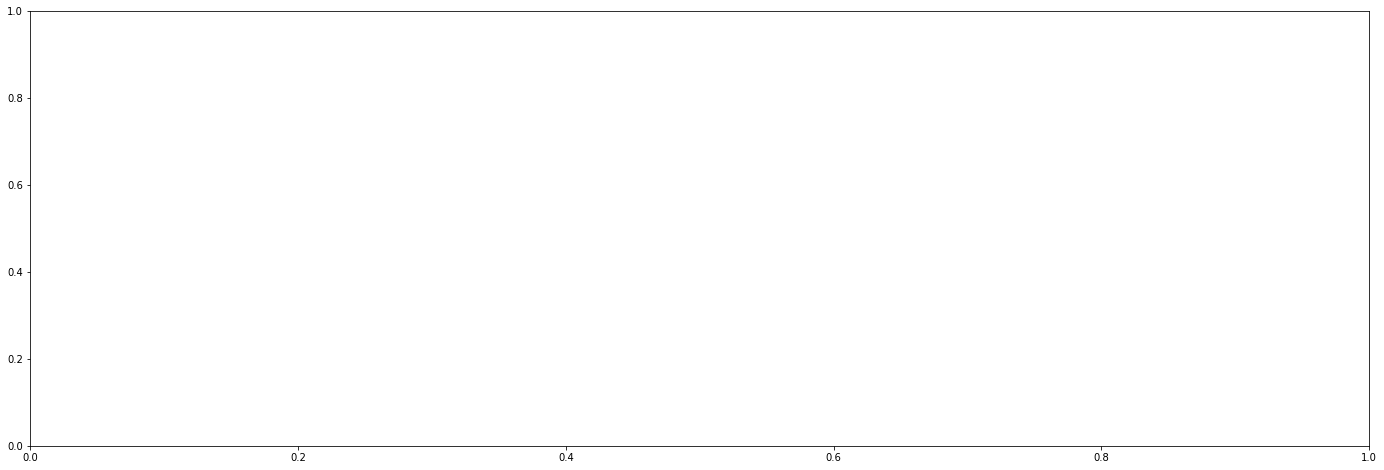

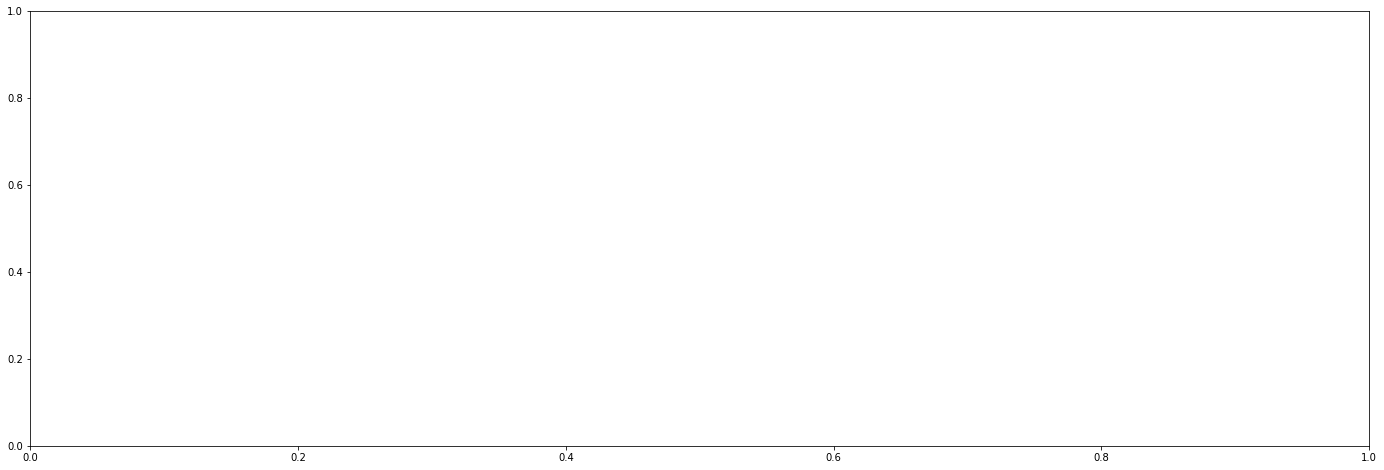

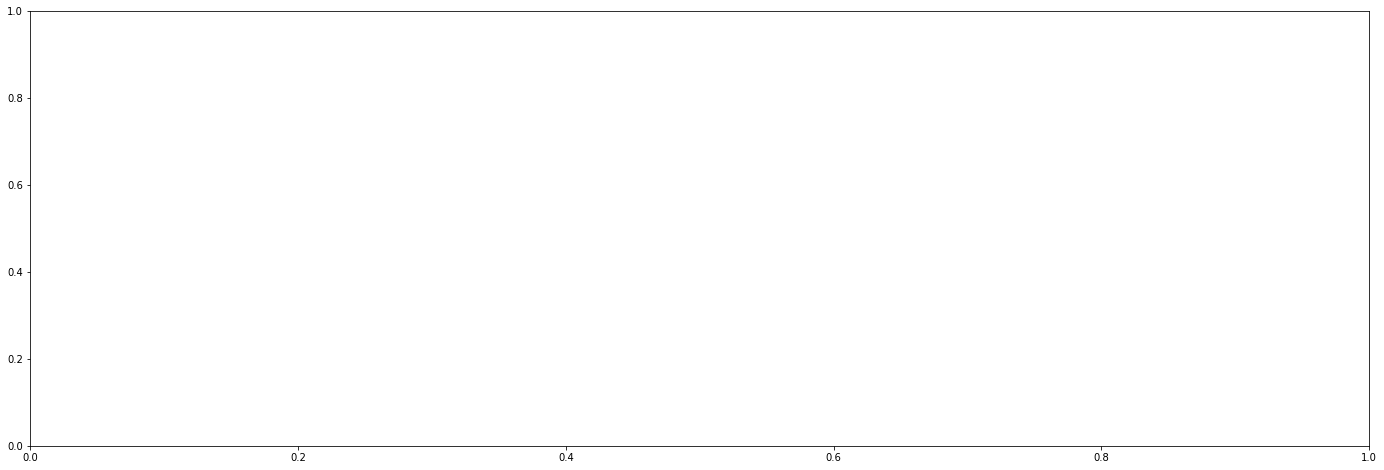

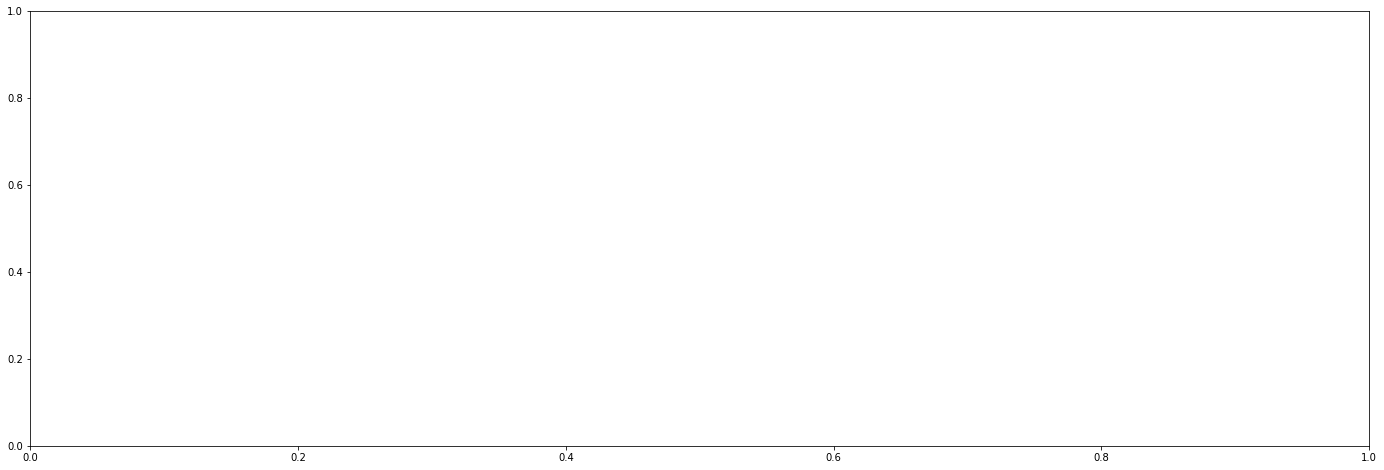

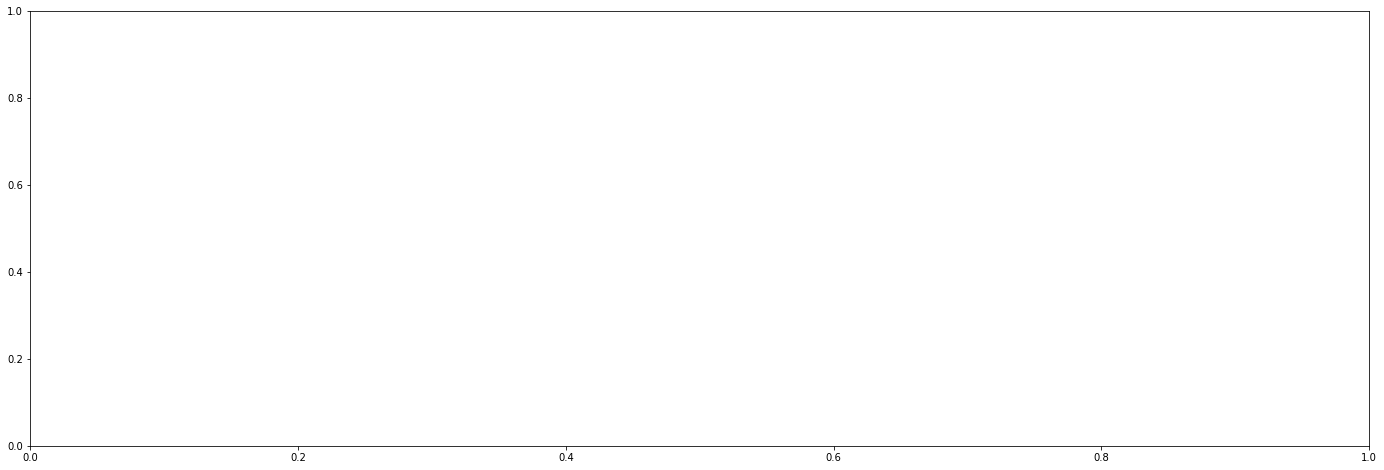

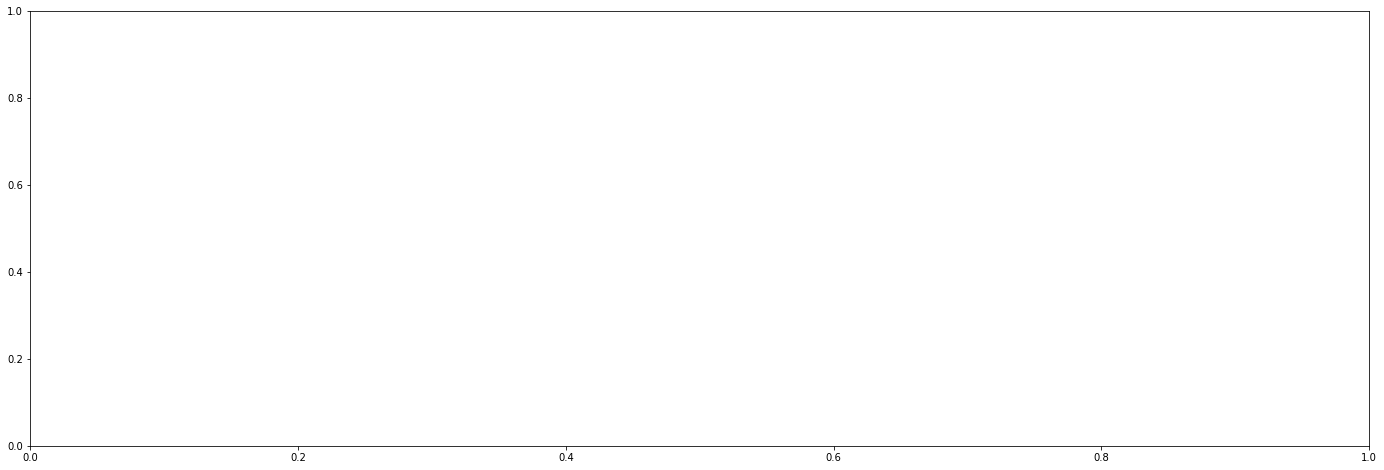

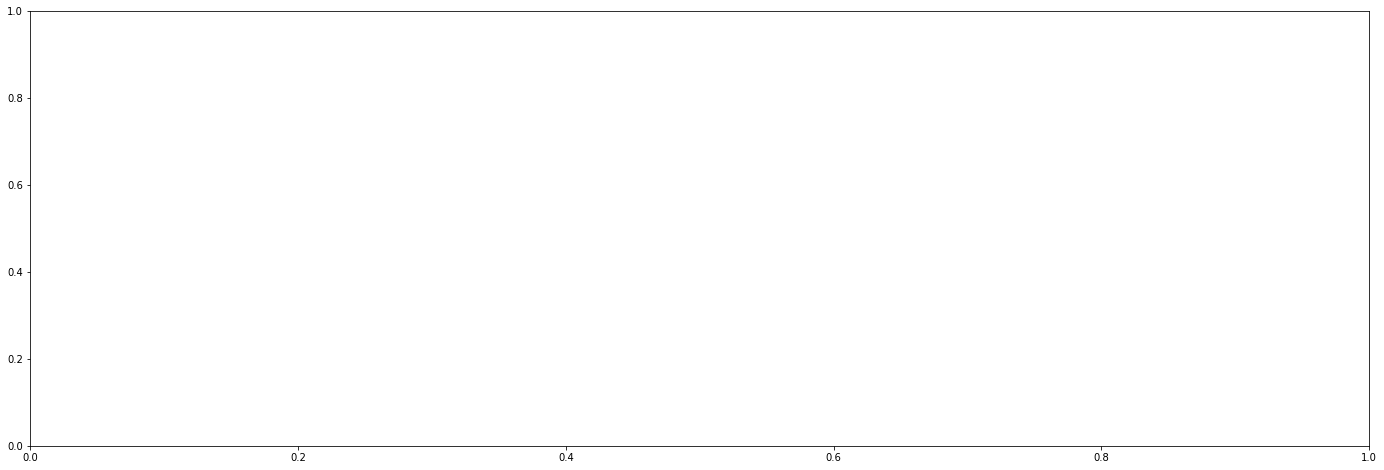

<Figure size 1728x576 with 0 Axes>

In [9]:
for i in range(len(df)): 
  image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/dataset/train/'+str(name[i])+'.jpg'), cv2.COLOR_BGR2RGB)
  #print(type(image))
  data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest') ##첫번째으로 돌림(나머지 다 주석)
  show_aug_image(image, data_generator, n_images=1)
  #data_generator = ImageDataGenerator(zoom_range=[0.5, 0.9])                     ## 런타임 다시 연결후 두번째로 돌림(나머지 다 주석)
  #show_aug_image(image, data_generator, n_images=1)
  #data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))               ## 런타임 다시 연결후 세번째로 돌림(나머지 다 주석)
  #show_aug_image(image, data_generator, n_images=1)
  #data_generator = ImageDataGenerator(brightness_range=(1.0, 2.0))               ## 런타임 다시 연결후 네번째로 돌림(나머지 다 주석)
  #show_aug_image(image, data_generator, n_images=1)
  print(idx)

#print(image.shape)
#img = Augmentor.Pipeline("/content/drive/MyDrive/Colab_Notebooks/image")


In [48]:
df

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32989,TRAIN_32989,./train/TRAIN_32989.jpg,1,0,0,0,1,0,1,1,1,1
32990,TRAIN_32990,./train/TRAIN_32990.jpg,1,0,0,0,0,1,1,1,1,1
32991,TRAIN_32991,./train/TRAIN_32991.jpg,1,0,0,0,0,1,1,1,1,1
32992,TRAIN_32992,./train/TRAIN_32992.jpg,1,0,0,0,0,1,1,1,1,1


In [ ]:
id = np.array(id)
print(id)
img_path = np.array(img_path)
print(img_path)


add_df = pd.DataFrame({'id' : id,'img_path' : img_path},)
col = ['A','B','C','D','E','F','G','H','I','J']
for c in col:
  add_df[c] = 0


In [78]:
labels = get_labels(df)
add_df.iloc[:,2:] = labels


<class 'numpy.ndarray'>


In [56]:
add_df

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,copy_0,./train/copy_0.jpg,1,0,0,0,0,0,0,0,0,0
1,copy_1,./train/copy_1.jpg,1,0,0,0,0,0,0,0,0,0
2,copy_2,./train/copy_2.jpg,1,0,0,0,0,0,0,0,0,0
3,copy_3,./train/copy_3.jpg,1,0,0,0,0,0,0,0,0,0
4,copy_4,./train/copy_4.jpg,1,0,0,0,0,0,0,0,0,0
5,copy_5,./train/copy_5.jpg,1,0,0,0,0,0,0,0,0,0
6,copy_6,./train/copy_6.jpg,1,0,0,0,0,0,0,0,0,0
7,copy_7,./train/copy_7.jpg,1,0,0,0,0,0,0,0,0,0


In [10]:
df = pd.concat([df,add_df], ignore_index = True)
df

NameError: ignored

In [ ]:
df.to_csv('./add_data_train.csv', index=False)